In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import warnings
warnings.filterwarnings("ignore")

def streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan):
    x = np.linspace(x_kiri,x_kanan, 30)
    y = np.linspace(y_kiri,y_kanan, 30)
    X, Y = np.meshgrid(x,y)
    u, v = np.zeros_like(X), np.zeros_like(X)
    NI, NJ = X.shape
    
    for i in range(NI):
        for j in range(NJ):
            x, y = X[i, j], Y[i, j]
            r, theta = (x**2 + y**2)**0.5, np.arctan2(y, x)
            fp = dF(r, theta)
            u[i,j] = (r + fp[0]) * np.cos(theta + fp[1]) - x
            v[i,j] = (r + fp[0]) * np.sin(theta + fp[1]) - y
    
    # define system in terms of a Numpy array
    def Sys(X, t=0):
        return np.array([dX_dt(X[0],X[1])[0],dX_dt(X[0],X[1])[1]])
            
    fig,ax = plt.subplots(figsize=(12,8), dpi=100)
    plt.title('{} Potret Fasa Polar'.format(judul))
    plt.axis('square')
    plt.axis([x_kiri, x_kanan, y_kiri, y_kanan])
    ax.set_xlabel('$\mathbf{x}$').set_fontsize(15)
    ax.set_ylabel('$\mathbf{y}$', rotation=0).set_fontsize(15)
    
    # orbit tambahan (jika diperlukan bisa ditambahkan)
    warna = ['r','g','b','k','m','y','c']
    n = len(warna)-1
    for i in range(4):    #range nya bisa diatur atur dari 1-5
        ts = [np.linspace(0,5*x_kanan,100), 
              np.linspace(5*x_kiri,0,100),
              np.linspace(5*x_kiri,5*x_kanan,100),
              np.linspace(0,0,100),
              np.linspace(100*x_kiri,100*x_kanan,5)]
        ic1 = np.linspace(-0.25,0.25,3)   #bagian ini dapat diubah ubah sesuai kebutuhan
        for p in ic1:
            for q in ic1:
                x0 = [p,q]
                xs = odeint(Sys, x0, ts[i], atol=1e-7, rtol=1e-11, mxstep=5000)
                plt.plot(xs[:,0],xs[:,1], warna[i]+'-')
        ic2 = np.linspace(-3,5,3)      #line 48-53 ini dapat di comment/uncomment sesuai kebutuhan
        for p in ic2:
            for q in ic2:
                x0 = [p,q]
                xs = odeint(Sys, x0, ts[i], atol=1e-7, rtol=1e-11, mxstep=5000)
                plt.plot(xs[:,0],xs[:,1], warna[n-i]+'-') 
    
    # stream plot
    plt.streamplot(X, Y, u, v, color=np.linalg.norm(np.dstack([u, v]), axis=-1), cmap='autumn', density=2, linewidth=1)
    
    # quiver plot
    Q = plt.quiver(X, Y, u, v, pivot='tip')
    qk = ax.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E', coordinates='figure')

    if simpan==True:
        ax.set_rasterized(True)
        fig.savefig('potret{}.png'.format(judul), bbox_inches="tight", format='png', dpi=1000)
    return plt.show()

Diberikan sistem Persamaan diferensial pada $\mathbb{R}^2$ sebagai berikut:

$\begin{align}
\frac{dx}{dt} &= -5y+3x\left(a+2b(x^2+y^2)-4(x^2+y^2)^2\right), \\
\frac{dy}{dt} &= 5x+3y\left(a+2b(x^2+y^2)-4(x^2+y^2)^2\right).
\end{align}$

Misalkan digunakan perubahan transformasi dari koordinat kartesius ke koordinat polar untuk memudahkan dalam perhitungan dan analisis, sehingga persamaan transformasinya diberikan sebagai berikut:

$\begin{align}
r^2 &=x^2+y^2,       &\tan \theta &= \frac{y}{x}   &(1)\\
x   &= r \cos \theta, &y           &= r \sin \theta &(2) 
\end{align}$

sehingga berlaku untuk $r\ge 0$ dan $\theta\in(0,2\pi)$ dengan pemetaan $\mathbb{R}^2\to \mathbb{R}\times (0,2\pi)$.

Jika pada persamaan kiri pada (1) diturunkan terhadap $t$ (waktu), dan subtitusi pada persamaan di soal diperoleh

$\begin{align}
r \frac{dr}{dt} &= x \frac{dx}{dt} + y \frac{dy}{dt} \nonumber \\
r \frac{dr}{dt} &=
x\left(-5y+3x\left(a+2b(x^2+y^2)-4(x^2+y^2)^2\right)\right) + y\left(5x+3y\left(a+2b(x^2+y^2)-4(x^2+y^2)^2\right)\right)  \nonumber \\
r \frac{dr}{dt} &= 3(x^2+y^2)\left(a+2b(x^2+y^2)-4(x^2+y^2)^2\right) \nonumber \\
\frac{dr}{dt} &= 3r(a+2br^2-4r^4) \label{transform}
\end{align}$

Kemudian jika pada persamaan kanan pada (1) diturunkan terhadap $t$ (waktu), dan subtitusi pada persamaan di soal diperoleh

$\begin{align}
\sec^2 \theta \frac{d\theta}{dt} &= \frac{x \dfrac{dy}{dt}-  y \dfrac{dx}{dt}}{x^2} \nonumber \\
\frac{1}{\cos^2 \theta} \frac{d\theta}{dt} &= \frac{5x^2+y^2}{x^2} \nonumber \\
r^{2} \frac{d\theta}{dt} &= 5x^2+5y^2 \nonumber \\
\frac{d\theta}{dt} &= 5 \label{dtheta} 
\end{align}$

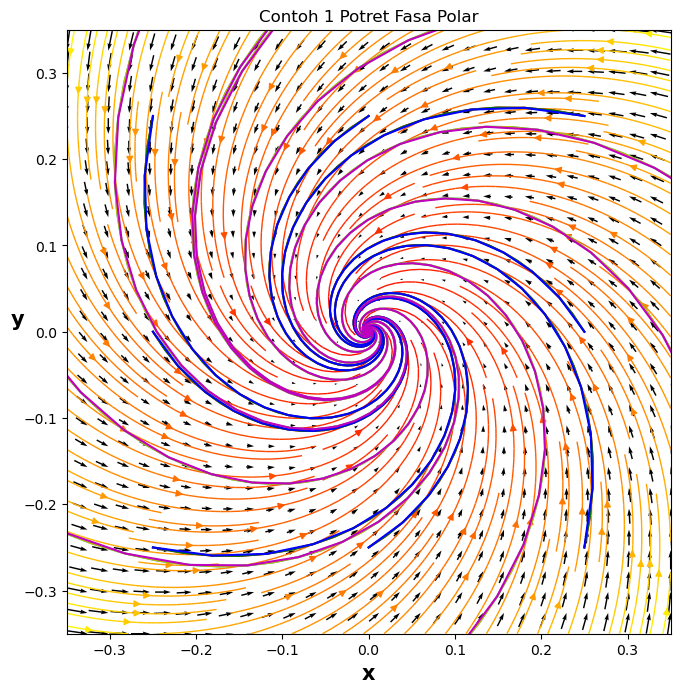

In [58]:
a =-1; b = 0
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
# def dX_dt(x,y):
#     return [-5*x[1]+3*x[0]*(a + 2*b*(x[0]**2+x[1]**2)-4*(x[0]**2+x[1]**2)**2), 5*x[0]+3*x[1]*(a + 2*b*(x[0]**2+x[1]**2)-4*(x[0]**2+x[1]**2)**2)]
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
# def dF(r, theta):
#     return 3*r*(a+2*b*r**2-4*r**4), 5
x_kiri,x_kanan,y_kiri,y_kanan = -0.35,0.35,-0.35,0.35                                                              #batas-batas nilai x dan y
judul = 'Contoh 1'
simpan = False                                                                                                     #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)

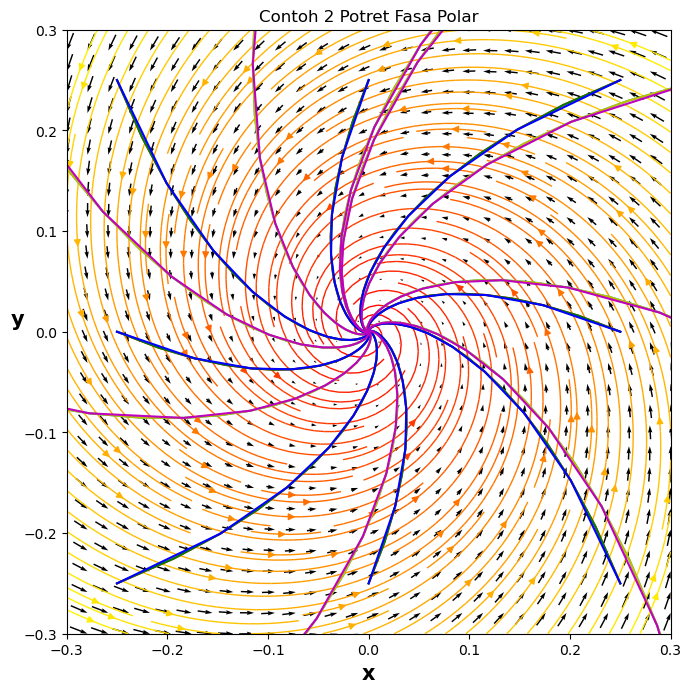

In [25]:
a =-4; b = 1
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
x_kiri,x_kanan,y_kiri,y_kanan = -0.3,0.3,-0.3,0.3                                                                  #batas-batas nilai x dan y
judul = 'Contoh 2'
simpan = False                                                                                                     #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)

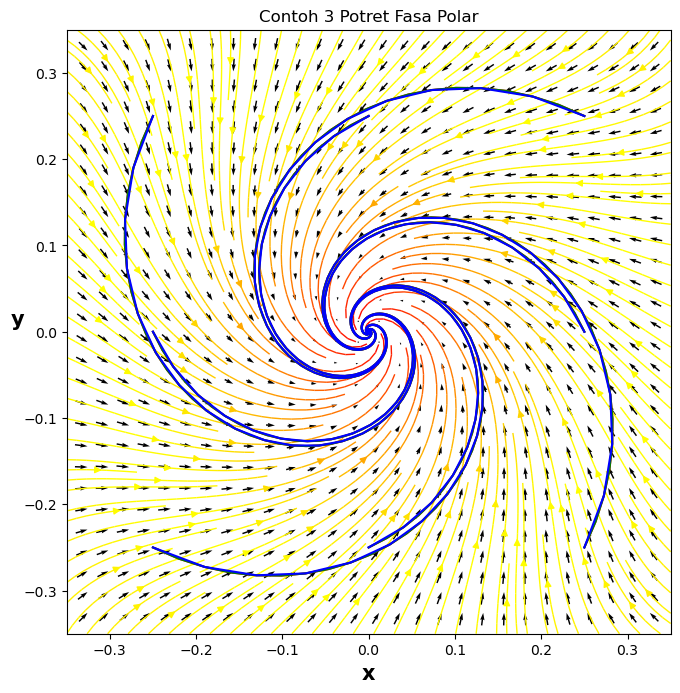

In [26]:
a =-1; b = 2
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
x_kiri,x_kanan,y_kiri,y_kanan = -0.35,0.35,-0.35,0.35                                                              #batas-batas nilai x dan y
judul = 'Contoh 3'
simpan = False                                                                                                     #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)

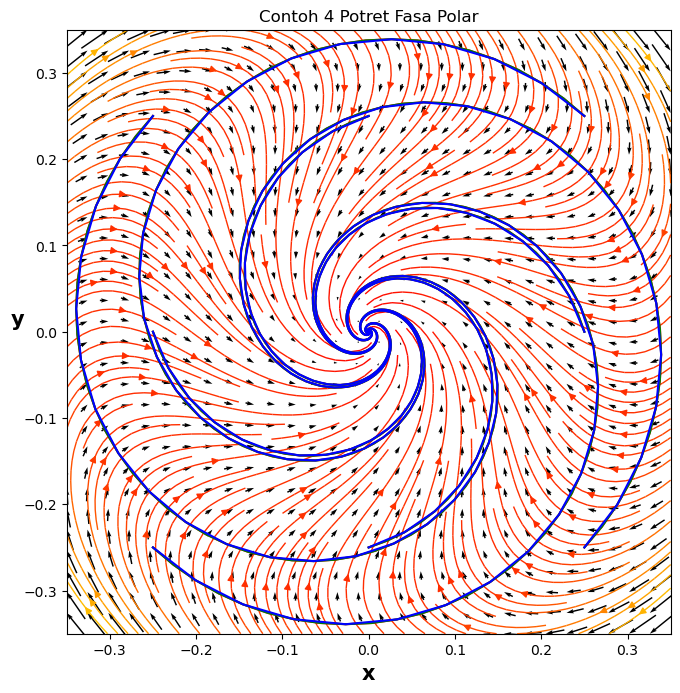

In [27]:
a =-1; b = 4
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
x_kiri,x_kanan,y_kiri,y_kanan = -0.35,0.35,-0.35,0.35                                                              #batas-batas nilai x dan y
judul = 'Contoh 4'
simpan = False                                                                                                     #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)

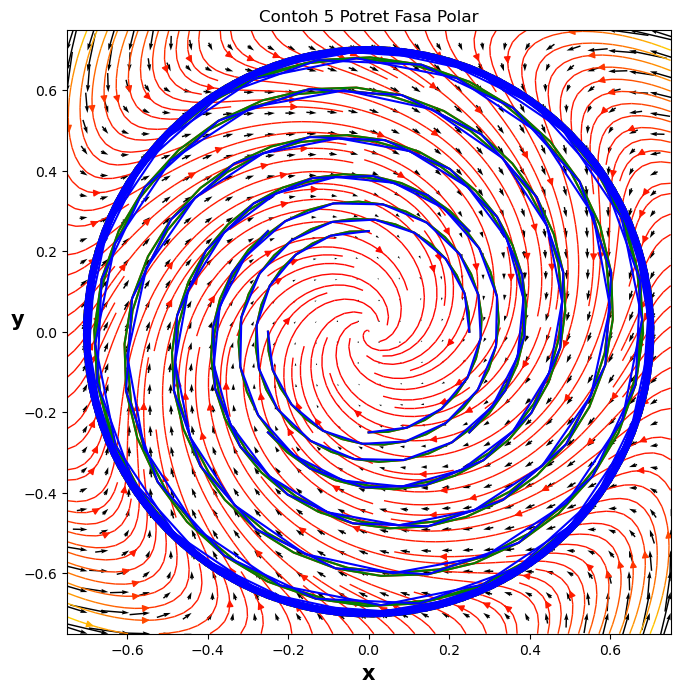

In [56]:
a = 0; b = 1
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
x_kiri,x_kanan,y_kiri,y_kanan = -0.75,0.75,-0.75,0.75                                                              #batas-batas nilai x dan y
judul = 'Contoh 5'
simpan = True                                                                                                      #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)

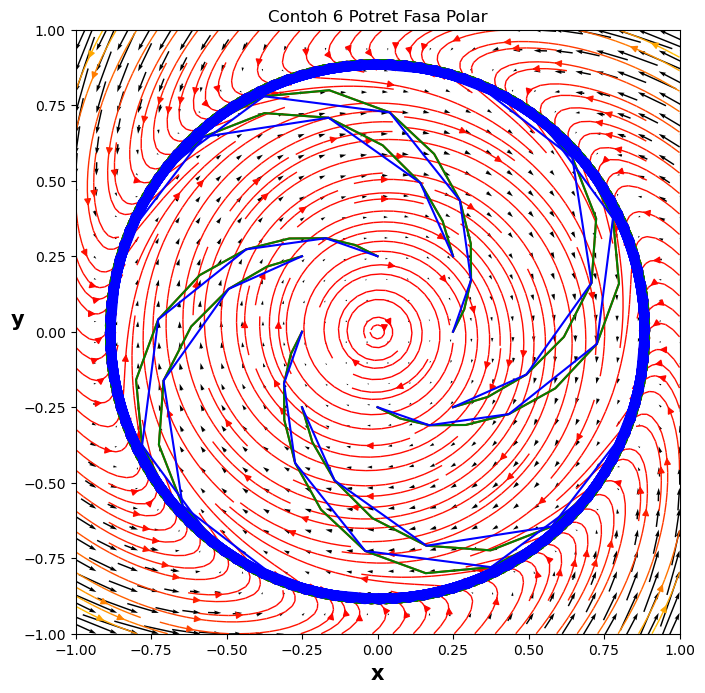

In [38]:
a = 1; b = 1
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
x_kiri,x_kanan,y_kiri,y_kanan = -1,1,-1,1                                                                          #batas-batas nilai x dan y
judul = 'Contoh 6'
simpan = False                                                                                                     #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)

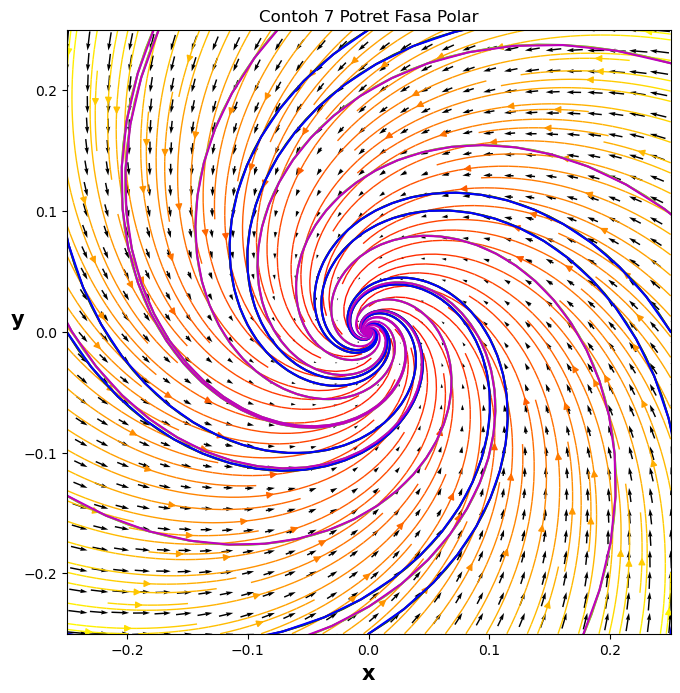

In [54]:
a = -1; b = 0
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
x_kiri,x_kanan,y_kiri,y_kanan = -0.25,0.25,-0.25,0.25                                                              #batas-batas nilai x dan y
judul = 'Contoh 7'
simpan = False                                                                                                     #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)

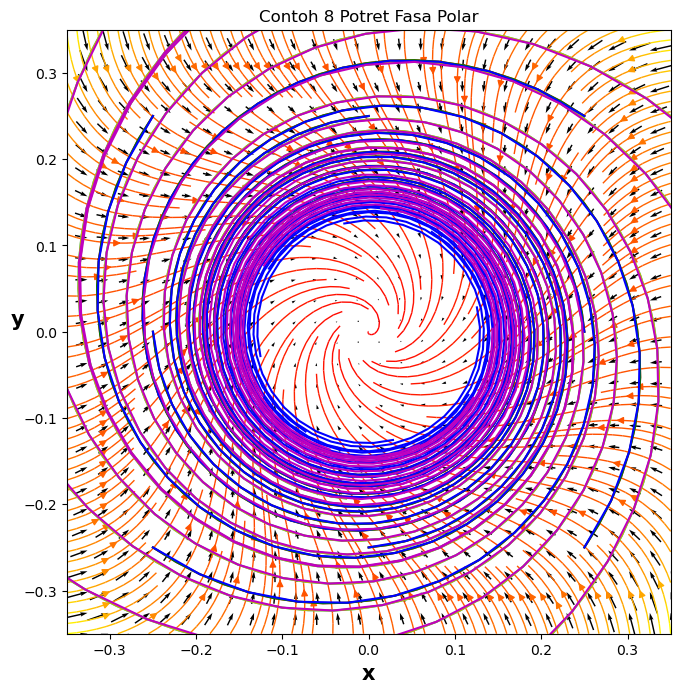

In [45]:
a = 0; b = -1
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
x_kiri,x_kanan,y_kiri,y_kanan = -.35,.35,-.35,.35                                                                  #batas-batas nilai x dan y
judul = 'Contoh 8'
simpan = False                                                                                                     #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)

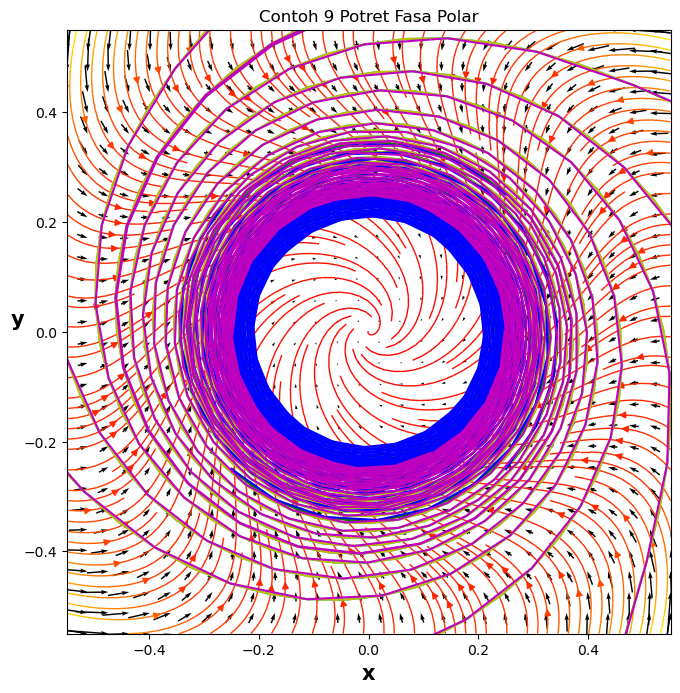

In [53]:
a = 0; b = 0
dX_dt = lambda x,y: (-5*y+3*x*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2), 5*x+3*y*(a+2*b*(x**2+y**2)-4*(x**2+y**2)**2))  #Sistem PD Awal
dF = lambda r,theta: (3*r*(a+2*b*r**2-4*r**4), 5)                                                                  #Sistem PD Polar
x_kiri,x_kanan,y_kiri,y_kanan = -.55,.55,-.55,.55                                                                  #batas-batas nilai x dan y
judul = 'Contoh 9'
simpan = False                                                                                                     #simpan gambar True/False

streamplot_polar(dF,dX_dt,x_kiri,x_kanan,y_kiri,y_kanan,judul,simpan)